In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('/content/bitcoin.csv')

In [5]:
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [6]:
df.drop(['Date'],1,inplace=True)

<ipython-input-6-9eb6254188c1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Date'],1,inplace=True)


In [7]:
b=df.head()
print(b)

         Price
0  7881.846680
1  7987.371582
2  8052.543945
3  8673.215820
4  8805.778320


In [8]:
predictionDays = 60
df['Prediction'] = df[['Price']].shift(-predictionDays)
c=df.head()
print(c)

         Price    Prediction
0  7881.846680  10343.106450
1  7987.371582   9900.767578
2  8052.543945   9811.925781
3  8673.215820   9911.841797
4  8805.778320   9870.303711


In [9]:
p=df.tail()
print(p)

           Price  Prediction
362  9729.038086         NaN
363  9522.981445         NaN
364  9081.761719         NaN
365  9182.577148         NaN
366  9180.045898         NaN


In [10]:
x = np.array(df.drop(['Prediction'],1))
x = x[:len(df)-predictionDays]
print(x)


[[ 7881.84668 ]
 [ 7987.371582]
 [ 8052.543945]
 [ 8673.21582 ]
 [ 8805.77832 ]
 [ 8719.961914]
 [ 8659.487305]
 [ 8319.472656]
 [ 8574.501953]
 [ 8564.016602]
 [ 8742.958008]
 [ 8208.995117]
 [ 7707.770996]
 [ 7824.231445]
 [ 7822.023438]
 [ 8043.951172]
 [ 7954.12793 ]
 [ 7688.077148]
 [ 8000.32959 ]
 [ 7927.714355]
 [ 8145.857422]
 [ 8230.923828]
 [ 8693.833008]
 [ 8838.375   ]
 [ 8994.488281]
 [ 9320.352539]
 [ 9081.762695]
 [ 9273.521484]
 [ 9527.160156]
 [10144.55664 ]
 [10701.69141 ]
 [10855.37109 ]
 [11011.10254 ]
 [11790.91699 ]
 [13016.23145 ]
 [11182.80664 ]
 [12407.33203 ]
 [11959.37109 ]
 [10817.15527 ]
 [10583.13477 ]
 [10801.67773 ]
 [11961.26953 ]
 [11215.4375  ]
 [10978.45996 ]
 [11208.55078 ]
 [11450.84668 ]
 [12285.95801 ]
 [12573.8125  ]
 [12156.5127  ]
 [11358.66211 ]
 [11815.98633 ]
 [11392.37891 ]
 [10256.05859 ]
 [10895.08984 ]
 [ 9477.641602]
 [ 9693.802734]
 [10666.48242 ]
 [10530.73242 ]
 [10767.13965 ]
 [10599.10547 ]
 [10343.10645 ]
 [ 9900.767578]
 [ 9811.

<ipython-input-10-38031f952bcd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'],1))


In [11]:
y = np.array(df['Prediction'])
y = y[:-predictionDays]
print(y)

[10343.10645   9900.767578  9811.925781  9911.841797  9870.303711
  9477.677734  9552.860352  9519.145508  9607.423828 10085.62793
 10399.66895  10518.17481  10821.72656  10970.18457  11805.65332
 11478.16895  11941.96875  11966.40723  11862.93652  11354.02441
 11523.5791   11382.61621  10895.83008  10051.7041   10311.5459
 10374.33887  10231.74414  10345.81055  10916.05371  10763.23242
 10138.04981  10131.05566  10407.96484  10159.96094  10138.51758
 10370.82031  10185.5       9754.422852  9510.200195  9598.173828
  9630.664063  9757.970703 10346.76074  10623.54004  10594.49316
 10575.5332   10353.30273  10517.25488  10441.27637  10334.97461
 10115.97559  10178.37207  10410.12695  10360.54688  10358.04883
 10347.71289  10276.79395  10241.27246  10198.24805  10266.41504
 10181.6416   10019.7168   10070.39258   9729.324219  8620.566406
  8486.993164  8118.967773  8251.845703  8245.915039  8104.185547
  8293.868164  8343.276367  8393.041992  8259.992188  8205.939453
  8151.500488  7988.1

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)
predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]
print(predictionDays_array)

[[6681.062988]
 [6716.44043 ]
 [6469.79834 ]
 [6242.193848]
 [5922.042969]
 [6429.841797]
 [6438.644531]
 [6606.776367]
 [6793.624512]
 [6733.387207]
 [6867.527344]
 [6791.129395]
 [7271.78125 ]
 [7176.414551]
 [7334.098633]
 [7302.089355]
 [6865.493164]
 [6859.083008]
 [6971.091797]
 [6845.037598]
 [6842.427734]
 [6642.109863]
 [7116.804199]
 [7096.18457 ]
 [7257.665039]
 [7189.424805]
 [6881.958496]
 [6880.323242]
 [7117.20752 ]
 [7429.724609]
 [7550.900879]
 [7569.936035]
 [7679.867188]
 [7795.601074]
 [7807.058594]
 [8801.038086]
 [8658.553711]
 [8864.766602]
 [8988.59668 ]
 [8897.46875 ]
 [8912.654297]
 [9003.070313]
 [9268.761719]
 [9951.518555]
 [9842.666016]
 [9593.896484]
 [8756.430664]
 [8601.795898]
 [8804.477539]
 [9269.987305]
 [9733.72168 ]
 [9328.197266]
 [9377.013672]
 [9670.739258]
 [9726.575195]
 [9729.038086]
 [9522.981445]
 [9081.761719]
 [9182.577148]
 [9180.045898]]


<ipython-input-12-3903e80d5da3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]


In [13]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(xtrain, ytrain)

SVR(C=1000.0, gamma=1e-05)

In [14]:
svr_rbf_confidence = svr_rbf.score(xtest,ytest)
print('SVR_RBF accuracy :',svr_rbf_confidence)


SVR_RBF accuracy : -0.13172464037492415


In [15]:
svm_prediction = svr_rbf.predict(xtest)
print(svm_prediction)
print()
print(ytest)

[ 7368.53633682  8165.68587325  7926.79130275 10207.16299004
  9519.7521376   8936.92746042  8549.31020685  7667.37990772
  7947.09263723  7713.65459935  7907.3742647   7385.64655856
  7896.61205898 10092.26964018  8086.31615702  9549.54627479
  8565.10177677  7391.10179206 10337.12832731  9494.91623671
  7424.56507709  7705.51123985  8193.28960872  9031.13803315
  8971.58681583  7512.97657331 10133.1320784   8176.2133795
  7511.47364786  8211.38273978  9216.28288632  7287.78989295
  7448.61272777  7598.67797894  8870.22016104  7925.67308326
  8945.33520521  7598.5494554  10068.77019013  8158.81110489
  7375.64197489  7246.18253089 10299.31315032  9457.87543229
  8796.83361389  8085.2903344  10285.82384494  8795.7342695
 10342.58569856  8447.49393054 10019.26562021  8716.80925154
  7869.96225201  9673.15907428  7810.96351123  8254.12265445
  9711.91153404  7324.7806092   8708.95999877  9926.93193732
  7499.39903967  9080.49673852]

[10019.7168    8206.145508  7909.729492  7973.20752   

In [16]:
# Print the model predictions for the next 30 days
svm_prediction = svr_rbf.predict(predictionDays_array)
print(svm_prediction)
print(ytest)
#Print the actual price for bitcoin for last 30 days
print(df.tail(predictionDays))

[ 9428.65549752  9538.51975357  9140.2426656   9468.87699311
  9180.94010478  9167.98871343  9159.79688724  9247.38735474
  9809.91903684  9595.23044254 10070.23745657  9800.82222926
  9606.69207263 10023.43848002  9335.22078614  9470.57385158
 10063.58277053 10042.33077724 10320.72283271  9994.44223186
  9985.37013393  9324.24848173 10221.39633383 10271.07830229
  9671.17311072  9971.5581472  10116.06719998 10111.00388703
 10220.31813139  9037.89582359  9008.81582693  9041.75446434
  9363.09879543  9684.26347138  9698.86628929  8187.63722026
  8065.41234441  8195.62667212  8066.98326324  8184.87221987
  8175.14524929  8033.5734768   7285.2442294   7507.03795709
  7265.11693317  7694.03648099  8165.80628213  7960.5597385
  8188.8128012   7285.09477162  7325.806509    7338.33443912
  7454.40921587  7490.78262956  7341.30960951  7335.8403676
  7759.691621    7786.32831259  7426.22947072  7433.72250016]
[10019.7168    8206.145508  7909.729492  7973.20752   9726.575195
  8757.788086  8108.

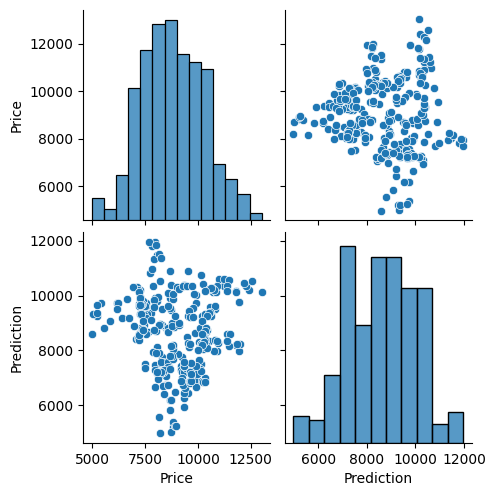

In [20]:
sns.pairplot(df)

<ipython-input-21-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

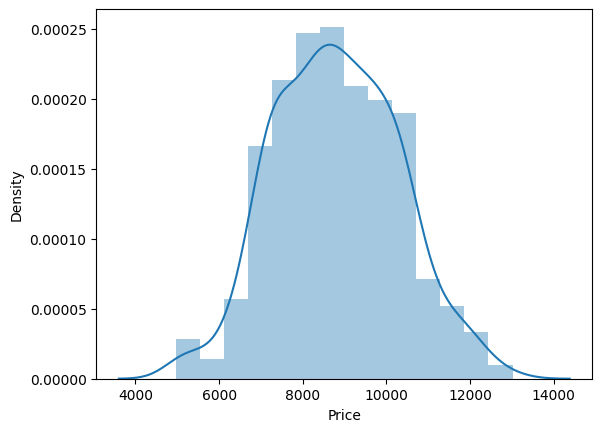

In [21]:
sns.distplot(df['Price'])

<Axes: >

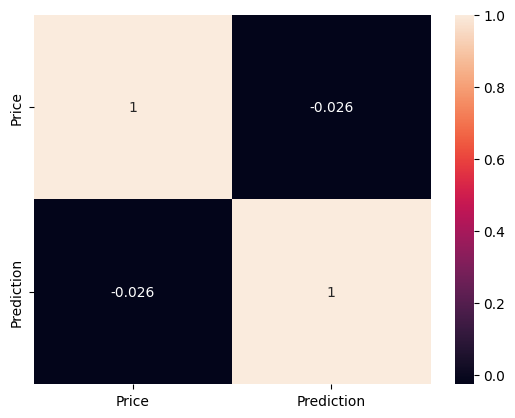

In [22]:
sns.heatmap(df.corr(), annot=True)